## SHAMSUDDEEN YUSUF
## ASSIGNMENT   1
## ADS/P7/24/035

In [79]:
# importing the necessary libraries
import pandas as pd 
import matplotlib.pyplot as plt

In [80]:
# reading the CSV file into a DataFrame
pets_df = pd.read_csv('form.csv')
pets_df

,birth_month,state,pet
0,January,NaN,Cats
1,JAN,CA,Cats
2,Sept,Hawaii,Dog
3,january,AK,Dog
4,July,RI,Cats
5,September,California,Cats
6,April,CA,Dog
7,January,California,Cats
8,November,FL,Dog
9,December,Florida,Cats


### Identified problem from the pets dataFrame

birth_month column

- Using initials for some months e.g Jan and sept
- Case inconsistency in January, january

state column
- Missing value in the first row NaN
- Abbreviated values (CA, FL, AK, etc.)
- Full names such as California, Florida

pet column
- Pluralization: Dog instead of Dogs.

In [81]:
pets_df

,birth_month,state,pet
0,January,NaN,Cats
1,JAN,CA,Cats
2,Sept,Hawaii,Dog
3,january,AK,Dog
4,July,RI,Cats
5,September,California,Cats
6,April,CA,Dog
7,January,California,Cats
8,November,FL,Dog
9,December,Florida,Cats


In [82]:
pets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   birth_month  10 non-null     object
 1   state        9 non-null      object
 2   pet          10 non-null     object
dtypes: object(3)
memory usage: 372.0+ bytes


In [83]:
pets_df.describe()

,birth_month,state,pet
count,10,9,10
unique,9,7,2
top,January,CA,Cats
freq,2,2,6


__Data cleaning__ 

### fixing the birth_month column

In [84]:
# Since the 'birth_month' column is in lowercase, we will capitalize the first letter of each month
pets_df['birth_month'] = pets_df['birth_month'].str.capitalize()

# Using dictionary to convert Jan to January, Sept to September, etc.
month_mapping = {
    'Jan': 'January',
    'Sep': 'September'
}

# Replacing the abbreviated month names with full names
pets_df['birth_month'] = pets_df['birth_month'].replace(month_mapping)

# Displaying the updated DataFrame
pets_df

,birth_month,state,pet
0,January,NaN,Cats
1,January,CA,Cats
2,Sept,Hawaii,Dog
3,January,AK,Dog
4,July,RI,Cats
5,September,California,Cats
6,April,CA,Dog
7,January,California,Cats
8,November,FL,Dog
9,December,Florida,Cats


In [85]:
# Creating a dictionaty to map the city names to their respective states
state_mapping = {
    'Hawaii': 'HI',
    'California': 'CA',
    'Florida': 'FL'
}

# Replacing the city names with their respective state abbreviations
pets_df['state'] = pets_df['state'].replace(state_mapping)

# Displaying the final DataFrame with updated month names and state abbreviations
pets_df

,birth_month,state,pet
0,January,NaN,Cats
1,January,CA,Cats
2,Sept,HI,Dog
3,January,AK,Dog
4,July,RI,Cats
5,September,CA,Cats
6,April,CA,Dog
7,January,CA,Cats
8,November,FL,Dog
9,December,FL,Cats


 ### dealing with the missing value in the state column

In [86]:
# Determining the mode of the 'state' column
state_mode = pets_df['state'].mode()[0]

# Displaying the mode of the 'state' column
print("Mode of the state column:", state_mode)

Mode of the state column: CA


In [87]:
# Fill the missing values in the state column with the mode
pets_df['state'].fillna(state_mode, inplace=True)

# Displaying the DataFrame after filling missing values
pets_df

C:\Users\PC\AppData\Local\Temp\ipykernel_13664\2414444710.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pets_df['state'].fillna(state_mode, inplace=True)


,birth_month,state,pet
0,January,CA,Cats
1,January,CA,Cats
2,Sept,HI,Dog
3,January,AK,Dog
4,July,RI,Cats
5,September,CA,Cats
6,April,CA,Dog
7,January,CA,Cats
8,November,FL,Dog
9,December,FL,Cats


### treating the pet column

In [88]:
# Since cats are in plural, we will convert the 'pet_type' column to singular
pets_df['pet'] = pets_df['pet'].str.replace('Cats', 'Cat')

# Displaying the cleaned DataFrame
pets_df

,birth_month,state,pet
0,January,CA,Cat
1,January,CA,Cat
2,Sept,HI,Dog
3,January,AK,Dog
4,July,RI,Cat
5,September,CA,Cat
6,April,CA,Dog
7,January,CA,Cat
8,November,FL,Dog
9,December,FL,Cat


The data frame is now clean and ready for analysis

# Data Visualization

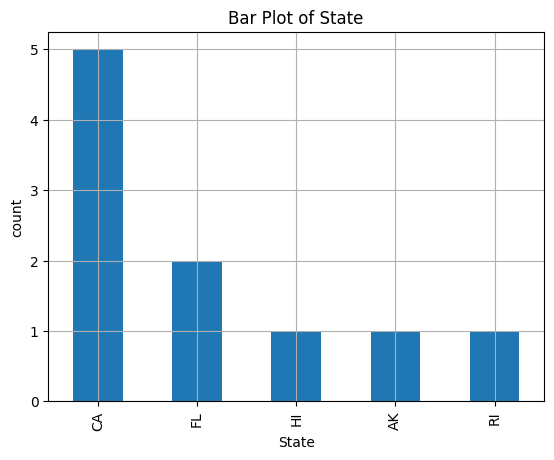

In [89]:
# count plot of the state column
pets_df['state'].value_counts().plot(kind='bar')
plt.title('Bar Plot of State')
plt.xlabel("State")
plt.ylabel("count")
plt.grid()
plt.show()
plt.show()

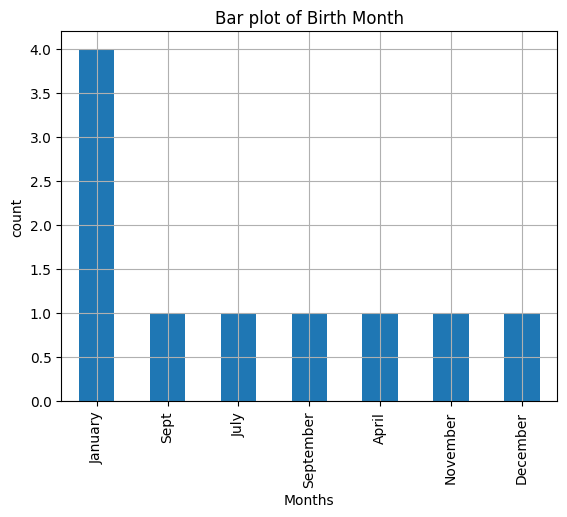

In [90]:
# count plot of the birth month of the pet
pets_df['birth_month'].value_counts().plot(kind='bar')
plt.title('Bar plot of Birth Month')
plt.xlabel("Months")
plt.ylabel("count")
plt.grid()
plt.show()
plt.show()

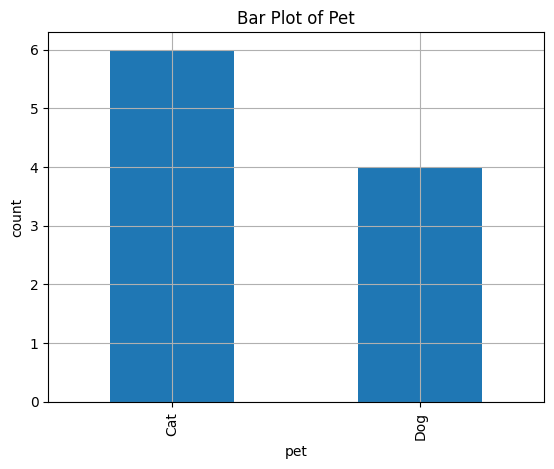

In [91]:
# count plot of the birth month of the pet
pets_df['pet'].value_counts().plot(kind='bar')
plt.title('Bar Plot of Pet')
plt.xlabel("pet")
plt.ylabel("count")
plt.grid()
plt.show()